In [87]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler #Z-score variables

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

# K Means

## 1. Explore

## 2. Build Model

In [88]:
bk = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/burger-king-items.txt",
                sep='\t')

bk.head()

,Item,Serving.size,Calories,Fat.Cal,Protein(g),Fat(g),Sat.Fat(g),Trans.fat(g),Chol(mg),Sodium(mg),Carbs(g),Fiber(g),Sugar(g),Meat,Breakfast,Not Breakfast,CarbsxMeat
0,Hamburger,109.0,260,90.0,13,10.0,4.0,0.0,35,490,28,1.0,6,1,0,1,28
1,Cheeseburger,121.0,300,130.0,16,14.0,6.0,0.0,45,710,28,1.0,6,1,0,1,28
2,Double_Hamburger,146.0,360,160.0,22,18.0,8.0,0.0,70,520,28,1.0,6,1,0,1,28
3,Double_Cheeseburger,171.0,450,230.0,26,26.0,12.0,1.0,95,960,29,1.0,6,1,0,1,29
4,Buck_Double,158.0,410,200.0,24,22.0,10.0,0.5,85,740,28,1.0,6,1,0,1,28


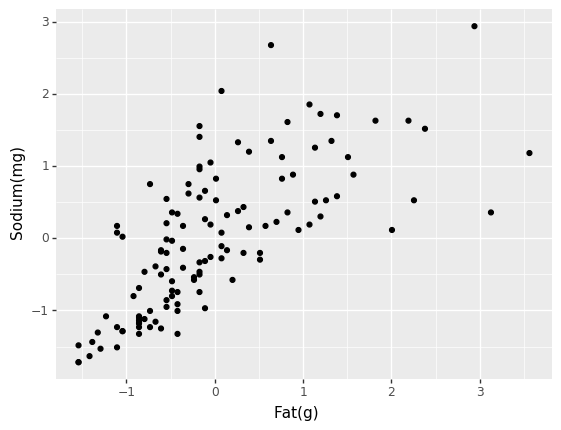

<ggplot: (312902991)>

In [89]:
features = ["Fat(g)", "Sodium(mg)"]
X = bk[features]

z = StandardScaler()
X[["Fat(g)", "Sodium(mg)"]] = z.fit_transform(X)

(ggplot(X, aes("Fat(g)", "Sodium(mg)")) + geom_point())

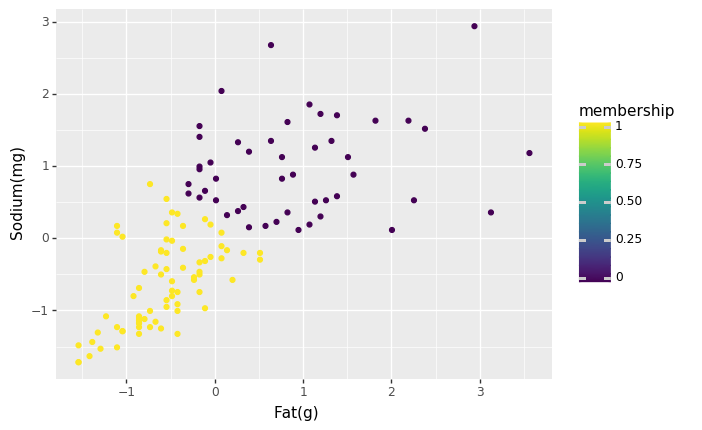

<ggplot: (315188053)>

In [90]:
km = KMeans(n_clusters = 2)
km.fit(X)

membership = km.predict(X)

X["cluster"] = membership

(ggplot(X, aes("Fat(g)", "Sodium(mg)", color = "membership")) + geom_point())

## 3. Evaluate Model

In [91]:
silhouette_score(X, membership)

0.5511252542124766

# Another Example

In [92]:
features = ["Fat(g)", "Sodium(mg)", "Calories", "Chol(mg)", "Sugar(g)", "Protein(g)"]
X = bk[features]

z = StandardScaler()
X[features] = z.fit_transform(X)

km = KMeans(n_clusters = 5)
km.fit(X)

membership = km.predict(X)

X["cluster"] = membership

silhouette_score(X, membership)

0.4824660947566632